In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

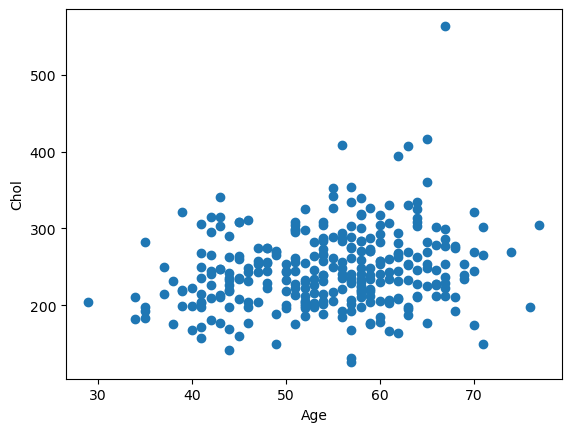

In [6]:
plt.scatter(df['Age'],df['Chol'])
plt.xlabel("Age")
plt.ylabel("Chol")
plt.show()

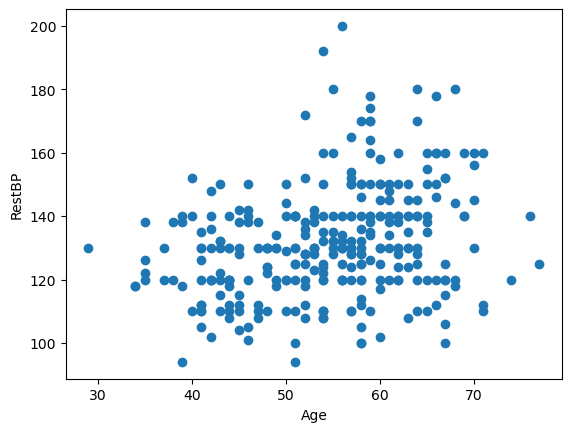

In [7]:
plt.scatter(df['Age'],df['RestBP'])
plt.xlabel("Age")
plt.ylabel("RestBP")
plt.show()

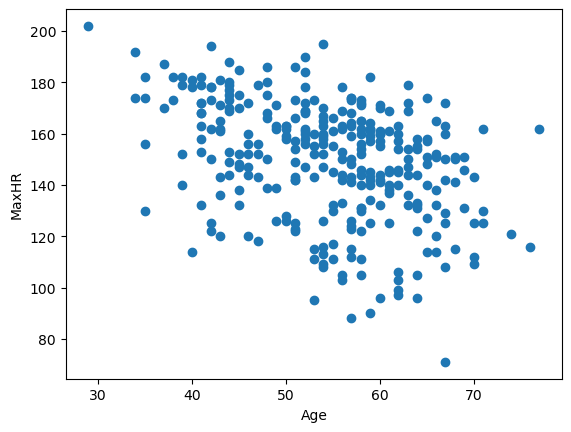

In [8]:
plt.scatter(df['Age'],df['MaxHR'])
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.show()

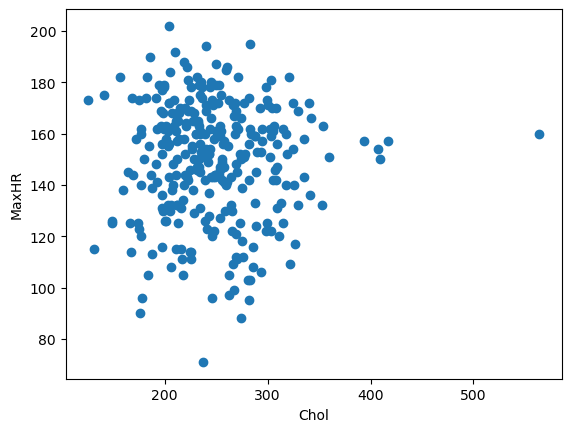

In [9]:
plt.scatter(df['Chol'],df['MaxHR'])
plt.xlabel("Chol")
plt.ylabel("MaxHR")
plt.show()

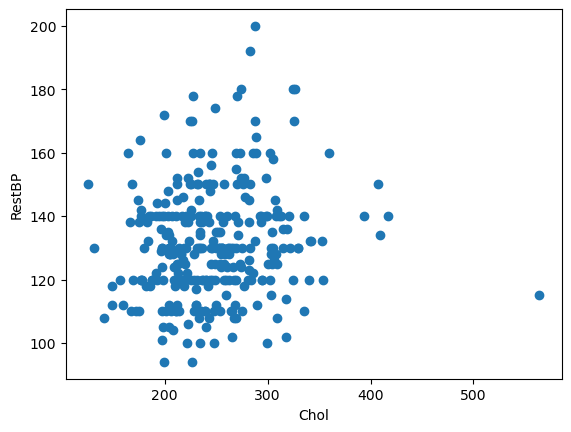

In [10]:
plt.scatter(df['Chol'],df['RestBP'])
plt.xlabel("Chol")
plt.ylabel("RestBP")
plt.show()

In [11]:
relevant_cols = ["Age", "RestBP", 
                 "Chol","MaxHR"]

customer_df = df[relevant_cols]

In [12]:
customer_df

,Age,RestBP,Chol,MaxHR
0,63,145,233,150
1,67,160,286,108
2,67,120,229,129
3,37,130,250,187
4,41,130,204,172
...,...,...,...,...
298,45,110,264,132
299,68,144,193,141
300,57,130,131,115
301,57,130,236,174


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df)
StandardScaler()
scaled_data = scaler.transform(customer_df)


In [14]:
scaled_data

array([[ 0.94872647,  0.75752504, -0.2649003 ,  0.01719733],
       [ 1.39200191,  1.61121989,  0.76041519, -1.82190531],
       [ 1.39200191, -0.6652997 , -0.34228261, -0.90235399],
       ...,
       [ 0.28381332, -0.0961698 , -2.23814899, -1.51538821],
       [ 0.28381332, -0.0961698 , -0.20686358,  1.06811312],
       [-1.82174501,  0.35913411, -1.38694368,  1.02432497]])

In [15]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [16]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

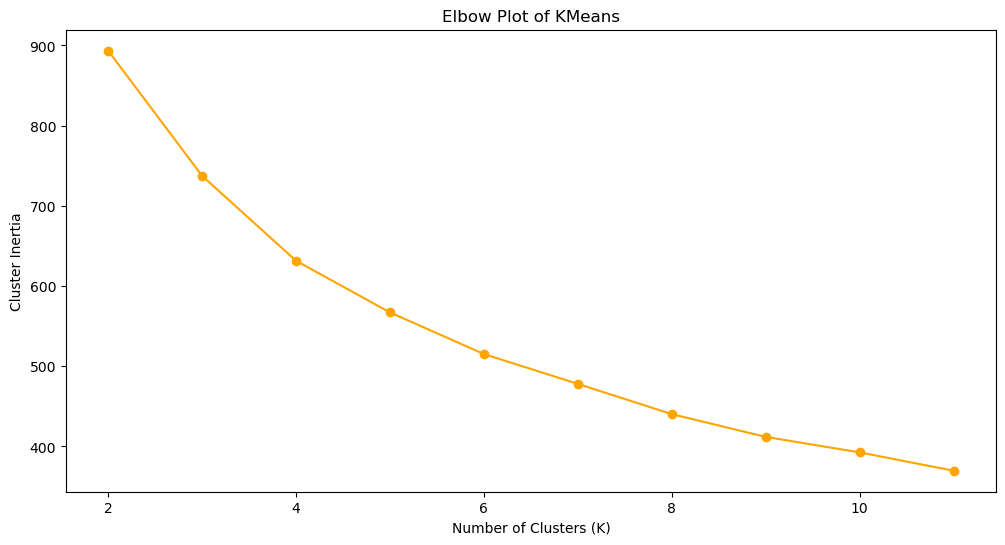

In [18]:
generate_elbow_plot(clusters_centers, k_values)

In [19]:
kmeans_model = KMeans(n_clusters = 6)

In [20]:
kmeans_model.fit(scaled_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [21]:
df["clusters"] = kmeans_model.labels_

In [22]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,clusters
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,4
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,5
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,2
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,4
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,5
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,4


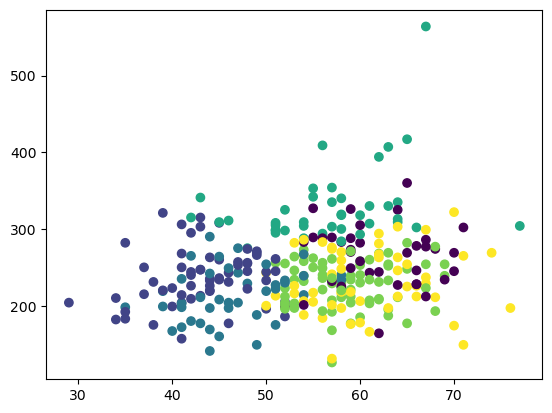

In [25]:
plt.scatter(df["Age"], 
            df["Chol"], 
            c = df["clusters"]
            )

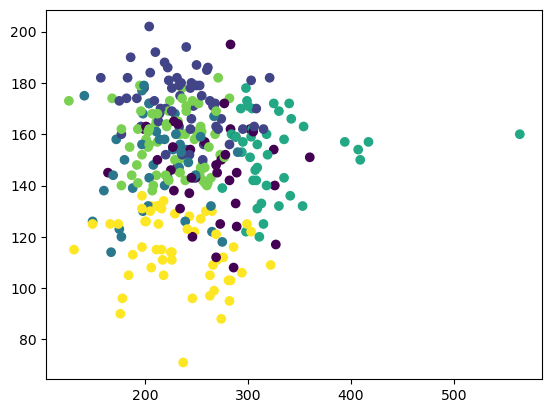

In [27]:
plt.scatter(df["Chol"], 
            df["MaxHR"], 
            c = df["clusters"]
            )